<a href="https://colab.research.google.com/github/justwannachill/NM/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%A8%D0%B8%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Варіант 14

In [ ]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.6 MB/s eta 0:00:00


In [ ]:
#Лабораторна робота 2
#Відокремлення коренів
import numpy as np
import numdifftools as nd
def f(x):
    return 3*x**4 - 4*x**3 + 2*x**2 - 4*x - 1


def find_segments(): #відокремлюємо корені
    search_range = np.arange(-10, 10, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')

Found segment:  [-1, 0]
Found segment:  [1, 2]


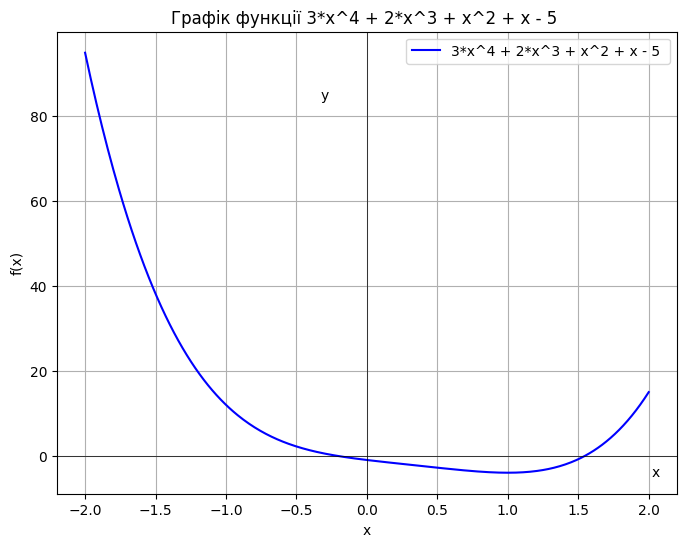

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return 3*x**4 - 4*x**3 + 2*x**2 - 4*x - 1

# Генерація значень x
x = np.linspace(-2, 2, 400)

# Генерація значень y
y = f(x)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='3*x^4 + 2*x^3 + x^2 + x - 5 ', color='blue')
plt.title('Графік функції 3*x^4 + 2*x^3 + x^2 + x - 5 ')
plt.xlabel('x')
plt.ylabel('f(x)')

# Додавання осей з стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(2.05, -4, 'x', ha='center', va='center')
plt.text(-0.3, 85
         , 'y', ha='center', va='center')
plt.grid(True)
plt.legend()
plt.show()

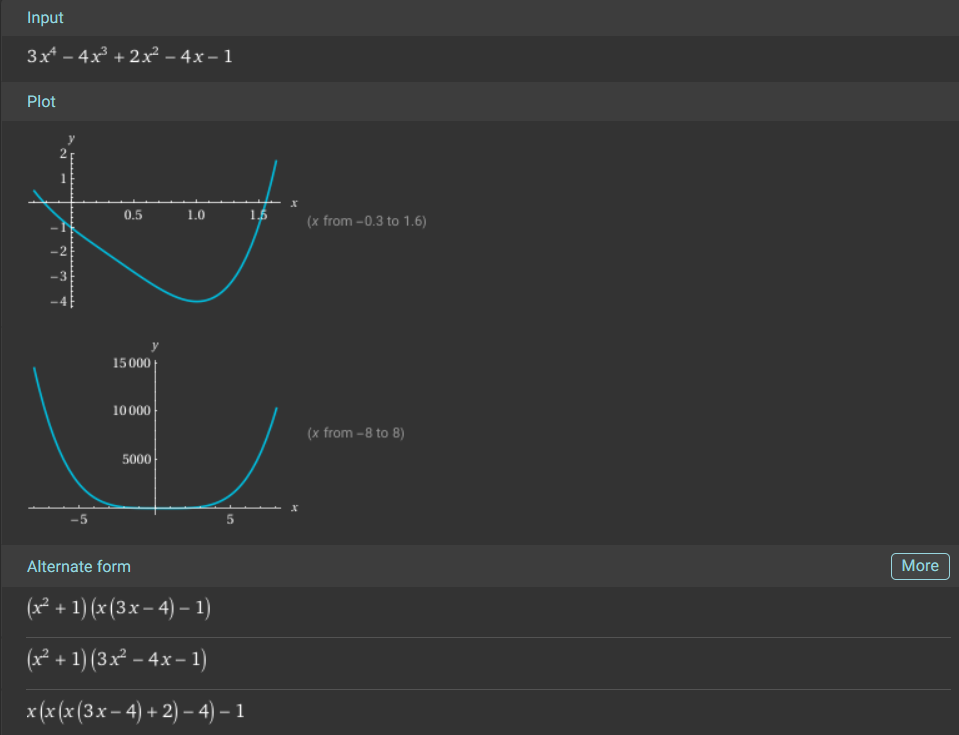

In [ ]:
#Лабораторна робота. Метод половинного ділення, хорд


def rec(a, b, eps):  # метод половинного ділення
    while (abs(a - b) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2

    print('x= ', round(x, 5), '  -   Half division method')

def hord(a, b, eps):  # метод хорд
    derivative_f = nd.Derivative(f, n=1)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while (abs(xi_1 - xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x= ', round(xi_1, 5), '  -   Chord method')

if __name__ == "__main__":
    a1, b1 = -2, -1
    a2, b2 = 0, 1
    eps = 0.001
    print("Розв'язки на відрізку [-2,-1]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\n Розв'язки на відрізку [0,1]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)


Розв'язки на відрізку [-2,-1]
x=  -1.00049   -   Half division method
x=  -0.21665   -   Chord method

 Розв'язки на відрізку [0,1]
x=  0.99951   -   Half division method
x=  -0.21522   -   Chord method


Висновок: ми зрозуміли як обчислювати корені нелінійного рівняння методами половинного ділення та хорд. Результати співпали, отже розрахунок має бути правильним